# Delay Time Distribution at two BPASS metallicties

In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import h5py
from pylab import cm
import numpy as np

In [9]:
# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.linewidth'] = 2

path = "../data/"

In [18]:
file = h5py.File(f"{path}/data.h5", "r")
DTD = file["DTD"]

In [42]:
event_types = ["Ia", "IIP", "II", "Ib", "Ic", "LGRB", "PISNe", "BBH", "BHNS", "BNS"]
Z1 = "z020" # 0.020
Z2 = "z001" # 0.001


# For each metallicity calculate the total rates, and calculate the CCSN rates + add the GW events
event_total = {}
for i in (Z1, Z2):
    event_total[i] = {}
    for j in event_types:
        event_total[i][j] = DTD[j][i][:]
    event_total[i]["CCSN"] = event_total[i]["II"] + event_total[i]["Ib"] + event_total[i]["Ic"] + event_total[i]["IIP"]

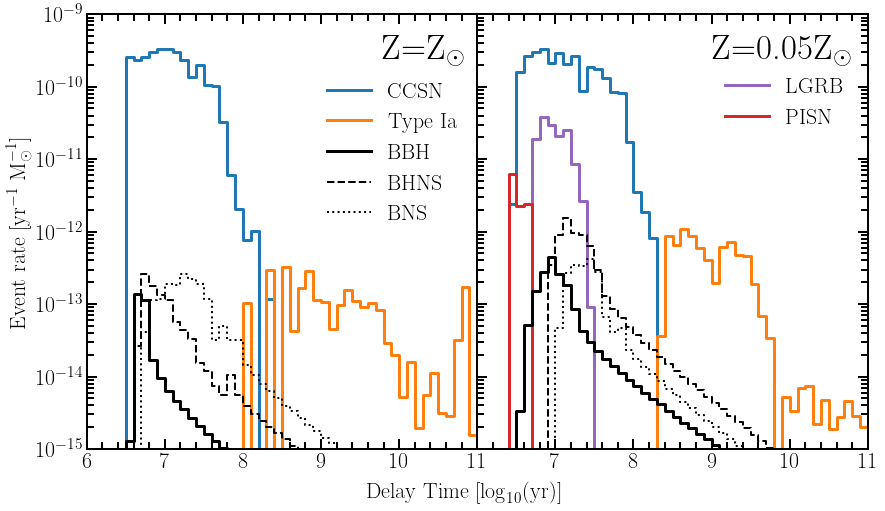

In [44]:
fig, axes =  plt.subplots(nrows=1, ncols=2, figsize=(14,8))
plt.subplots_adjust(wspace=0)

colors = cm.get_cmap('tab10', 10)

x1 = event_total[Z1]

x_axis = np.linspace(6.0, 11.0, 51)

# Add tick parameters for main axis
#ax = fig.add_axes([0, 0, 1, 1])
ax = axes[0]
# Set the minor and major ticks on both axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

# set the location of the ticks
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))

#ax.set_xlabel(r"Delay Time [$\log_{10}$(yr)]")
ax.set_ylabel(r"Event rate [yr$^{-1}$ M$_\odot^{-1}$]")

ax.step(x_axis, x1["CCSN"], where="post", color=colors(0), lw=3, label="CCSN")
ax.step(x_axis, x1["Ia"], where="post", color=colors(1), lw=3, label="Type Ia")
ax.step(x_axis, x1["PISNe"], where="post", color=colors(3), lw=3)
ax.step(x_axis, x1["LGRB"], where="post", color=colors(4), lw=3)
#ax.step(x_axis, x1["Ib"], where="post", color=colors(5), lw=3)
#ax.step(x_axis, x1["Ic"], where="post", color=colors(6), lw=3)


ax.step(x_axis, x1["BBH"], where="post", color='black', lw=3, label="BBH")
ax.step(x_axis, x1["BHNS"], where="post", color="black", lw=2, ls="--", label="BHNS")
ax.step(x_axis, x1["BNS"], where="post", color="black", lw=2, ls=":", label="BNS")


ax.set_yscale('log')
ax.set_xlim(6,11)
ax.set_ylim(1e-15,1e-9)

ax.legend(bbox_to_anchor=(1, 0.89), loc="upper right", frameon=False, fontsize=22, ncol=1)

x2 = event_total[Z2]

#ax.legend(bbox_to_anchor=(0.99, 0.99), loc="upper right", frameon=False, fontsize=16, ncol=2)
#ax2 = fig.add_axes([1,0,1,1])
ax2 = axes[1]
# Set the minor and major ticks on both axes
ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax2.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax2.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

# set the location of the ticks
ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))



ax2.step(x_axis, x2["CCSN"], where="post", color=colors(0), lw=3)
ax2.step(x_axis, x2["Ia"], where="post", color=colors(1), lw=3)
ax2.step(x_axis, x2["LGRB"], where="post", color=colors(4), lw=3, label="LGRB")
ax2.step(x_axis, x2["PISNe"], where="post", color=colors(3), lw=3, label="PISN")

ax2.step(x_axis, x2["BBH"], where="post", color='black', lw=3)
ax2.step(x_axis, x2["BHNS"], where="post", color="black", lw=2, ls="--")
ax2.step(x_axis, x2["BNS"], where="post", color="black", lw=2, ls=":")

#ax2.set_ylabel(r"Event rate $\left[ \frac{\mathrm{events/yr} }{\mathrm{M}_\odot^{\,}} \right]$")

ax.text(0.97, 0.9, r"Z=Z$_\odot$", horizontalalignment='right', transform=ax.transAxes, fontsize=35)
ax2.text(0.96, 0.9, r"Z=0.05Z$_\odot$", horizontalalignment='right', transform=ax2.transAxes, fontsize=35)

ax2.set_yscale('log')
ax2.set_xlim(6.00001,11)
ax2.set_ylim(1e-15,1e-9)
ax2.set_yticklabels([])
#ax2.set_xlabel(r"Delay Time [$\log_{10}$(yr)]")


#ax2.set_yticklabels([1e-9, 1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-9])
ax2.legend(bbox_to_anchor=(0.99, 0.90), loc="upper right", frameon=False, fontsize=22, ncol=1)

fig.text(0.5,0.03,r"Delay Time [$\log_{10}$(yr)]", ha="center", va="bottom")

#plt.show()
plt.savefig("images/pdf/DTD_horizontal.pdf", bbox_inches='tight')
plt.savefig("images/png/DTD_horizontal.png", dpi=300, bbox_inches='tight', transparent=False)

In [47]:
file.close()